In [1]:
data = []
with open('/home/toanngo/test_convergence.txt', 'r') as f:
    line = f.readline()
    for line in f:
        it = line.strip('\n').split('\t')
        for ep in it:
            data.append([int(i) for i in list(ep)])

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data_np = np.array(data)

In [18]:
data_np.shape

(97439, 699)

In [33]:
examine_data = data_np[0:3000, :]

In [37]:
x = np.sum((1-examine_data[0:3000,:]), axis=1)
y = np.bincount(x)
ii = np.nonzero(y)[0]
num_crash_count  = np.vstack((ii,y[ii])).T

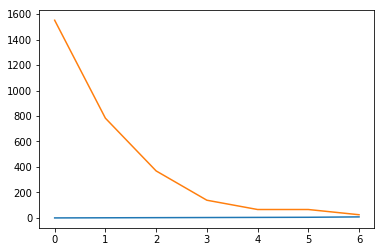

In [38]:
plt.plot(num_crash_count)

In [1]:
file = open('/home/toanngo/test_convergence.txt', "r")

number_of_lines = 0
number_eps_of_line = []
eps_of_line = []
for line in file:
    line = line.strip("\n")
    number_eps_of_line.append(len(line.split('\t')))
    eps_of_line.append(line.split('\t'))
    number_of_lines += 1

file.close()

print("lines:", number_of_lines)
print("num eps of lines:", number_eps_of_line)

lines: 998
num eps of lines: [7, 7, 14, 14, 21, 28, 28, 35, 35, 42, 42, 49, 56, 56, 63, 63, 70, 70, 77, 84, 84, 91, 91, 98, 98, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

In [2]:
data_100eps = []
data_200eps = []
it = eps_of_line[25]
for ep in it:
    data_100eps.append([int(i) for i in list(ep)])
    data_200eps.append([int(i) for i in list(ep)])
it = eps_of_line[499+25]
for ep in it:
    data_200eps.append([int(i) for i in list(ep)])

In [5]:
#examine_data = np.array(data_100eps)
examine_data = np.array(data_200eps)

In [6]:
x = np.sum((1-examine_data), axis=1)
y = np.bincount(x)
ii = np.nonzero(y)[0]
num_crash_count = np.vstack((ii,y[ii])).T

In [7]:
num_crash_count

array([[ 0, 96],
       [ 1, 49],
       [ 2, 25],
       [ 3, 13],
       [ 4,  8],
       [ 5,  6],
       [ 6,  2],
       [ 8,  1]])

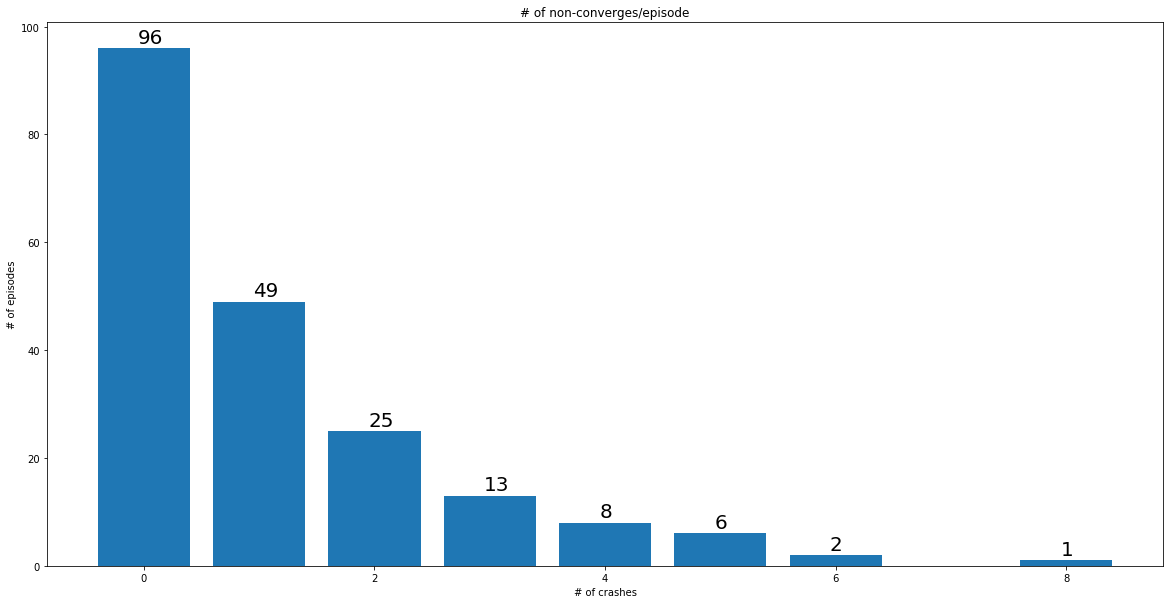

In [23]:
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1, figsize=(20, 10))
ax.set_title('# of non-converges/episode')
ax.set_xlabel('# of crashes')
ax.set_ylabel('# of episodes')
ax.bar(x=num_crash_count[:, 0], height=num_crash_count[:, 1])
for i in range(len(num_crash_count)):
    ax.text(num_crash_count[i, 0]-0.05, num_crash_count[i, 1] + 1, str(num_crash_count[i, 1]), fontsize=20)
plt.show()



In [121]:
distance = []
for ep in examine_data:
    count = 0
    for t in ep:
        if t == 0:
            #count += 1
            distance.append(count)
            count = 0
        else:
            count += 1

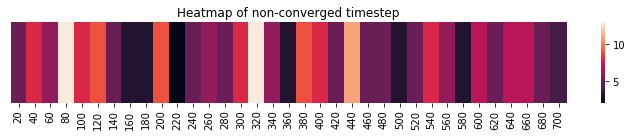

In [27]:
import seaborn as sns
crash_index = np.where(examine_data == 0)[1]
bins = np.arange(0, 720, 20)
num_crash_time = []
for i in range(1, len(bins)):
    num_crash_time.append(len(crash_index[np.digitize(crash_index, bins) == i]))

num_crash_time = np.array(num_crash_time)
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 10,2

fig, ax = plt.subplots(nrows=1, sharex=True)
ax.set_title('Heatmap of non-converged timestep')
extent = [0, 700, 0, 1]
#ax.imshow([num_crash_time], interpolation='none',aspect="auto", extent=extent)
sns.heatmap([num_crash_time], xticklabels=bins[1:])
ax.set_yticks([])


plt.tight_layout()
plt.show()

In [14]:
count = 0
for i in eps_of_line[25]:
    if i not in eps_of_line[499+25]:
        count += 1
print(count)

49


In [15]:
distance = []
for ep in examine_data:
    count = 0
    for t in ep:
        if t == 0:
            #count += 1
            if count != 0:
                distance.append(count)
            count = 0
        else:
            count += 1


In [16]:
from itertools import groupby
streak = []
for ep in examine_data:
    grouped_L = [(k, sum(1 for i in g)) for k,g in groupby(ep)]
    grouped_L = [i[1] for i in grouped_L if i[0]==0]
    streak.extend(grouped_L)

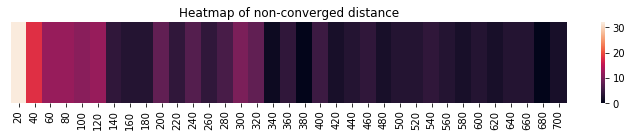

In [26]:
bins = np.arange(0, 720, 20)
distance = np.array(distance)
distance_crash_time = []
for i in range(1, len(bins)):
    distance_crash_time.append(len(distance[np.digitize(distance, bins) == i]))
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
plt.rcParams["figure.figsize"] = 10,2

fig, ax = plt.subplots(nrows=1, sharex=True)
ax.set_title('Heatmap of non-converged distance')
extent = [0, 700, 0, 1]
#ax.imshow([distance_crash_time], interpolation='none',aspect="auto", extent=extent)
sns.heatmap([distance_crash_time], xticklabels=bins[1:])
ax.set_yticks([])

plt.tight_layout()
plt.show()

In [18]:
distance

array([273,  35,   9, 107, 105, 312, 531,   8, 150,   5,   9, 172, 380,
        52, 245,   1,  46, 317, 545, 287,  86, 381, 275, 284, 599,  91,
        18,  92,  14,   6, 124, 108, 254,  29,   1,  25,  77,  24, 493,
         1,  33, 533,  77, 359, 207,  12, 310,  26,  14,  90,   7, 548,
       198,  15, 409, 305, 629, 526, 504, 598, 225,  46,   1, 544,  66,
       587, 312, 451, 202, 493,  42, 129,   3, 318, 302, 396, 343,  32,
        94, 383,  63,   4,   9, 290, 637, 114,  59, 201,  28, 484, 238,
       352,  66, 163, 234, 139,  50,  19, 410, 613, 192, 399, 184, 249,
        45,  91, 692, 458, 633,  46,   8, 262,  68, 117,   7, 294, 276,
       107, 124, 117, 441,  79, 191, 211, 257,  32,  80,  46, 477, 617,
        80, 442,   7, 284,  26, 293,   7,  27, 105, 111,  76, 237,  12,
       647, 195, 186,  93, 526, 106,   8,   7, 332,  70, 105, 222,  77,
       232,  87,  44,   8,  33, 292,  57, 694, 155, 656, 434,  22, 198,
       348,  26,  27, 283, 466, 283, 516, 301, 110, 192, 652,  7

In [284]:
distance_crash_time

[50, 24, 23, 7, 11, 11, 10, 18, 5, 5, 5, 6, 6, 7, 5, 5, 3]

In [285]:
num_crash_time

[13, 19, 17, 8, 12, 7, 11, 21, 9, 17, 16, 10, 8, 14, 10, 12, 12]

In [292]:
streak 

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1]

In [291]:
distance

[273,
 35,
 9,
 107,
 105,
 312,
 531,
 8,
 150,
 5,
 9,
 172,
 380,
 52,
 245,
 1,
 46,
 317,
 545,
 287,
 86,
 381,
 275,
 284,
 599,
 91,
 18,
 92,
 14,
 6,
 124,
 108,
 254,
 29,
 1,
 25,
 77,
 24,
 493,
 1,
 33,
 533,
 77,
 359,
 207,
 12,
 310,
 26,
 14,
 90,
 7,
 548,
 198,
 15,
 409,
 305,
 629,
 526,
 504,
 598,
 225,
 46,
 1,
 544,
 66,
 587,
 312,
 451,
 202,
 493,
 42,
 129,
 3,
 318,
 302,
 396,
 343,
 32,
 94,
 383,
 63,
 4,
 9,
 290,
 637,
 114,
 59,
 201,
 28,
 484,
 238,
 352,
 66,
 163,
 234,
 139,
 50,
 19,
 410,
 613,
 192,
 399,
 184,
 249,
 45,
 91,
 692,
 458,
 633,
 46,
 8,
 262,
 68,
 117,
 7,
 294,
 276,
 107,
 124,
 117,
 441,
 79,
 191,
 211,
 257,
 32,
 80,
 46,
 477,
 617,
 80,
 442,
 7,
 284,
 26,
 293,
 7,
 27,
 105,
 111,
 76,
 237,
 12,
 647,
 195,
 186,
 93,
 526,
 106,
 8,
 7,
 332,
 70,
 105,
 222,
 77,
 232,
 87,
 44,
 8,
 33,
 292,
 57,
 694,
 155,
 656,
 434,
 22,
 198,
 348,
 26,
 27,
 283,
 466,
 283,
 516,
 301,
 110,
 192,
 652,
 71,
 292,
 2